In [0]:
import sqlite3

In [0]:
conn = sqlite3.connect("teamfed.db")

In [0]:
c = conn.cursor()

In [0]:
c.execute("select * from HouseHoldDebtByState where state_fips='06'").fetchall()

[(5, 1999, 1, '06', 1.62, 1.75),
 (56, 1999, 2, '06', 1.62, 1.75),
 (107, 1999, 3, '06', 1.62, 1.75),
 (158, 1999, 4, '06', 1.33, 1.41),
 (209, 2000, 1, '06', 1.41, 1.51),
 (260, 2000, 2, '06', 1.51, 1.62),
 (311, 2000, 3, '06', 1.51, 1.62),
 (362, 2000, 4, '06', 1.41, 1.51),
 (413, 2001, 1, '06', 1.51, 1.62),
 (464, 2001, 2, '06', 1.51, 1.62),
 (515, 2001, 3, '06', 1.62, 1.75),
 (566, 2001, 4, '06', 1.51, 1.62),
 (617, 2002, 1, '06', 1.75, 1.89),
 (668, 2002, 2, '06', 1.75, 1.89),
 (719, 2002, 3, '06', 1.89, 2.13),
 (770, 2002, 4, '06', 1.75, 1.89),
 (821, 2003, 1, '06', 1.89, 2.13),
 (872, 2003, 2, '06', 1.89, 2.13),
 (923, 2003, 3, '06', 1.89, 2.13),
 (974, 2003, 4, '06', 1.89, 2.13),
 (1025, 2004, 1, '06', 2.13, None),
 (1076, 2004, 2, '06', 2.13, None),
 (1127, 2004, 3, '06', 2.13, None),
 (1178, 2004, 4, '06', 2.13, None),
 (1229, 2005, 1, '06', 2.13, None),
 (1280, 2005, 2, '06', 2.13, None),
 (1331, 2005, 3, '06', 2.13, None),
 (1382, 2005, 4, '06', 2.13, None),
 (1433, 2006, 1

In [0]:
c.description

(('id', None, None, None, None, None, None),
 ('year', None, None, None, None, None, None),
 ('qtr', None, None, None, None, None, None),
 ('state_fips', None, None, None, None, None, None),
 ('low', None, None, None, None, None, None),
 ('high', None, None, None, None, None, None))

In [0]:
c.execute("select * from GDP where date>=1999").fetchmany(10)

[(209, '1999-01-01', 9417.264),
 (210, '1999-04-01', 9524.152),
 (211, '1999-07-01', 9681.856),
 (212, '1999-10-01', 9899.378),
 (213, '2000-01-01', 10002.857),
 (214, '2000-04-01', 10247.679),
 (215, '2000-07-01', 10319.825),
 (216, '2000-10-01', 10439.025),
 (217, '2001-01-01', 10472.879),
 (218, '2001-04-01', 10597.822)]

In [0]:
c.description

(('id', None, None, None, None, None, None),
 ('date', None, None, None, None, None, None),
 ('gdp', None, None, None, None, None, None))

CA Debt and GDP in 3rd quarter

In [0]:
data = c.execute('''
select debt.year,low hh_debt,gdp from HouseHoldDebtByState debt join (select substr(date,0,5) year,substr(date,6,2) month,gdp from Gdp where date >= 1990) gdp
 on debt.year=gdp.year where debt.qtr=3 and debt.state_fips='06' and gdp.month='10'
 ''').fetchall() #be careful, the date is just a string
data

[(1999, 1.62, 9899.378),
 (2000, 1.51, 10439.025),
 (2001, 1.62, 10660.294),
 (2002, 1.89, 11071.463),
 (2003, 1.89, 11769.275),
 (2004, 2.13, 12522.425),
 (2005, 2.13, 13332.316),
 (2006, 2.13, 14037.228),
 (2007, 2.13, 14681.501),
 (2008, 2.13, 14559.543),
 (2009, 2.13, 14628.021),
 (2010, 2.13, 15240.843),
 (2011, 2.13, 15796.46),
 (2012, 2.13, 16358.863),
 (2013, 2.13, 17083.137),
 (2014, 1.89, 17849.912),
 (2015, 1.89, 18350.825),
 (2016, 1.75, 18991.883),
 (2017, 1.89, 19918.91),
 (2018, 1.75, 20897.804)]

In [0]:
c.description

(('year', None, None, None, None, None, None),
 ('hh_debt', None, None, None, None, None, None),
 ('gdp', None, None, None, None, None, None))

In [0]:
import matplotlib.pyplot as plt
import numpy as np

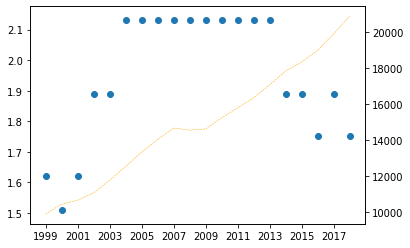

In [0]:
years = [x[0] for x in data]
debt = [x[1] for x in data]
gdp = [x[2] for x in data]
plt.scatter(years,debt)
ax2 = plt.twinx()
plt.plot(years,gdp,'--',lw=0.5,c='orange')
plt.xticks(np.arange(1999,2019,2))
plt.show()

In [0]:
np.arange(len(years))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

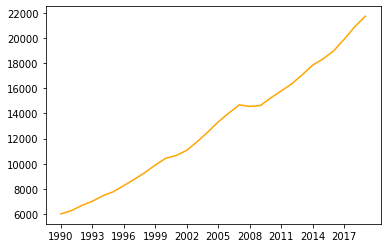

In [0]:
gdp = c.execute("select substr(date,0,5) year,gdp from GDP where substr(date,6,2)='10' and year>='1990'").fetchall()
gdp_years = [int(x[0]) for x in gdp]
gdp_vals = [x[1] for x in gdp]
plt.plot(gdp_years,gdp_vals,c='orange')
plt.xticks(np.arange(1990,2020,3))
plt.show()